# **1. Import data**

### **1.1 Import .csv files that are already preprocessed and the null values are filled.**

In [ ]:
import pandas as pd
import numpy as np

# The separator for these csv files is not the default comma (,),
# but rather the semicolon (;)
auction_data_df = pd.read_csv("auction_data_df_(na_filled).csv")
forecast_inputs_df = pd.read_csv("forecast_inputs_df_(na_filled).csv")
system_prices_df = pd.read_csv("system_prices_df_(na_filled).csv")

Let's create a table with the relevant input variables for the purpose of forecasting the price of the second auction

In [ ]:
forecast_inputs_df = forecast_inputs_df.join(auction_data_df[['Date (WET)','price_second_auction','traded_volume_second_auction']].set_index('Date (WET)'),
                                      on='Date (WET)')
forecast_inputs_df.head(10)

,Date (WET),demand_plus_system_margin,demand,within_day_availability,margin,within_day_margin,long_term_wind,long_term_solar,long_term_wind_over_demand,long_term_wind_over_margin,...,long_term_solar_over_margin,margin_over_demand,snsp_forecast,stack_price,within_day_potential_stack_price,previous_day_ahead_price,previous_continuous_half_hour_vwap,inertia_forecast,price_second_auction,traded_volume_second_auction
0,2021-01-01 00:00:00,56513.64,30182.0,40389.06,-26331.64,-15268.70,-3674.64,0.0,-12,-14,...,0.0,-87.0,29.95,67.79,68.88,65.02,59.69,214.67,65.73,5102.4
1,2021-01-01 01:00:00,56506.94,29269.0,40389.06,-27237.94,-16191.00,-3667.94,0.0,-13,-14,...,0.0,-93.0,31.05,67.79,68.45,62.00,51.86,205.47,64.96,4771.5
2,2021-01-01 02:00:00,56502.20,27245.0,40389.06,-29257.20,-18226.26,-3663.20,0.0,-14,-13,...,0.0,-108.0,32.80,67.73,67.79,54.16,46.29,191.12,60.47,4176.2
3,2021-01-01 03:00:00,56487.24,25545.5,40389.06,-30941.74,-19935.30,-3648.24,0.0,-15,-12,...,0.0,-121.0,34.95,67.61,67.73,51.94,54.22,176.23,52.50,3755.9
4,2021-01-01 04:00:00,56373.63,24180.0,40389.06,-32193.63,-21212.69,-3534.63,0.0,-15,-11,...,0.0,-134.0,36.70,66.48,67.67,49.17,57.26,163.59,48.98,4047.5
5,2021-01-01 05:00:00,56247.17,24396.5,40389.06,-31850.67,-20893.73,-3408.17,0.0,-14,-11,...,0.0,-131.0,35.90,66.67,67.67,50.07,56.57,166.91,48.95,4172.7
6,2021-01-01 06:00:00,56114.37,25267.5,40389.06,-30846.87,-19877.43,-3275.37,0.0,-13,-11,...,0.0,-122.0,34.60,67.59,67.79,54.59,60.09,172.70,48.96,3977.3
7,2021-01-01 07:00:00,56114.82,26175.0,40389.06,-29939.82,-18945.88,-3275.82,0.0,-13,-11,...,0.0,-115.0,33.20,67.67,67.79,50.07,49.27,182.07,52.02,9598.4
8,2021-01-01 08:00:00,56139.97,27364.0,40389.06,-28775.97,-17831.53,-3300.97,-72.5,-12,-12,...,0.0,-105.0,31.75,67.73,67.79,58.93,49.61,193.95,51.05,8562.6
9,2021-01-01 09:00:00,56203.18,29964.0,40389.06,-26239.18,-15620.74,-3364.18,-405.0,-12,-13,...,-2.0,-88.0,30.65,67.79,68.76,60.08,73.78,211.02,55.47,7714.6


### **1.2. Skewness and outliers**

In [ ]:
forecast_inputs_df[forecast_inputs_df.describe().columns[1:]].skew(axis=0, skipna=True).sort_values(ascending=False)

previous_continuous_half_hour_vwap    6.048209
price_second_auction                  3.742994
previous_day_ahead_price              3.217815
within_day_potential_stack_price      1.696613
stack_price                           1.323313
snsp_forecast                         0.379998
inertia_forecast                      0.262795
demand                                0.176571
traded_volume_second_auction          0.148638
within_day_availability               0.081035
long_term_wind_over_margin           -0.149518
within_day_margin                    -0.304949
margin                               -0.364669
long_term_wind                       -0.434660
long_term_wind_over_demand           -0.716600
margin_over_demand                   -0.736954
long_term_solar                      -1.362301
long_term_solar_over_demand          -1.401543
long_term_solar_over_margin          -2.216577
dtype: float64

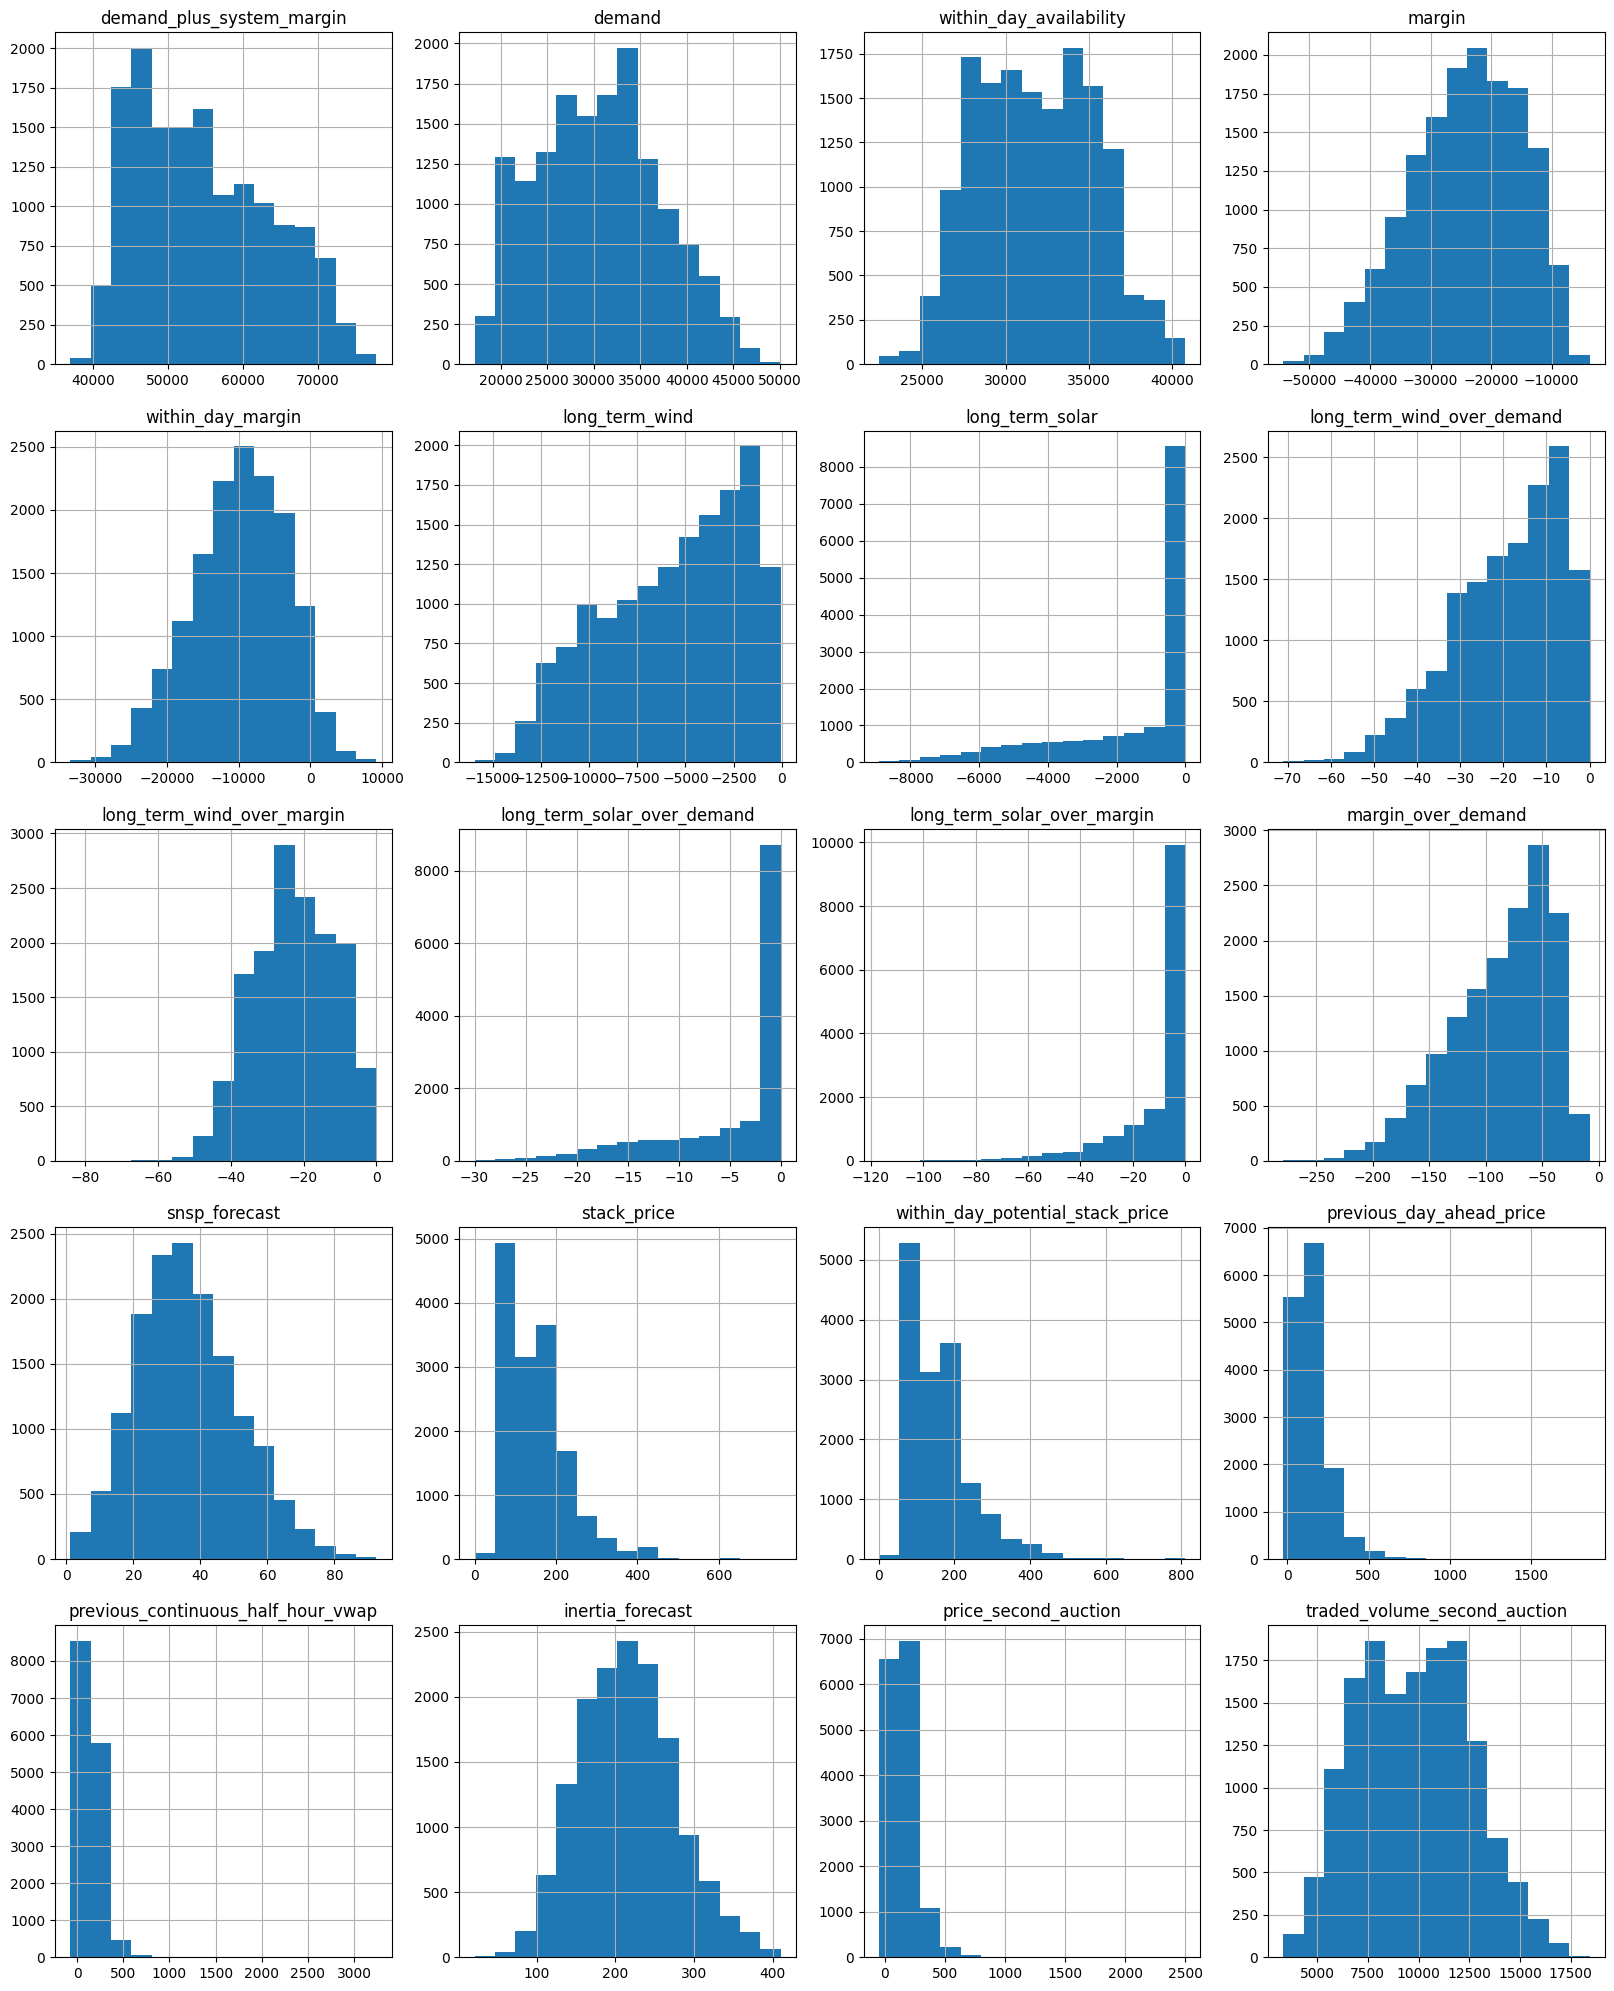

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(df, column, n_rows, n_cols):
    fig = plt.figure(figsize =(20, 25))
    for i, var_name in enumerate(column):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=15,ax=ax)
        ax.set_title(var_name)
    plt.show()


plot_histograms(forecast_inputs_df, forecast_inputs_df.columns[1:], 5, 4)

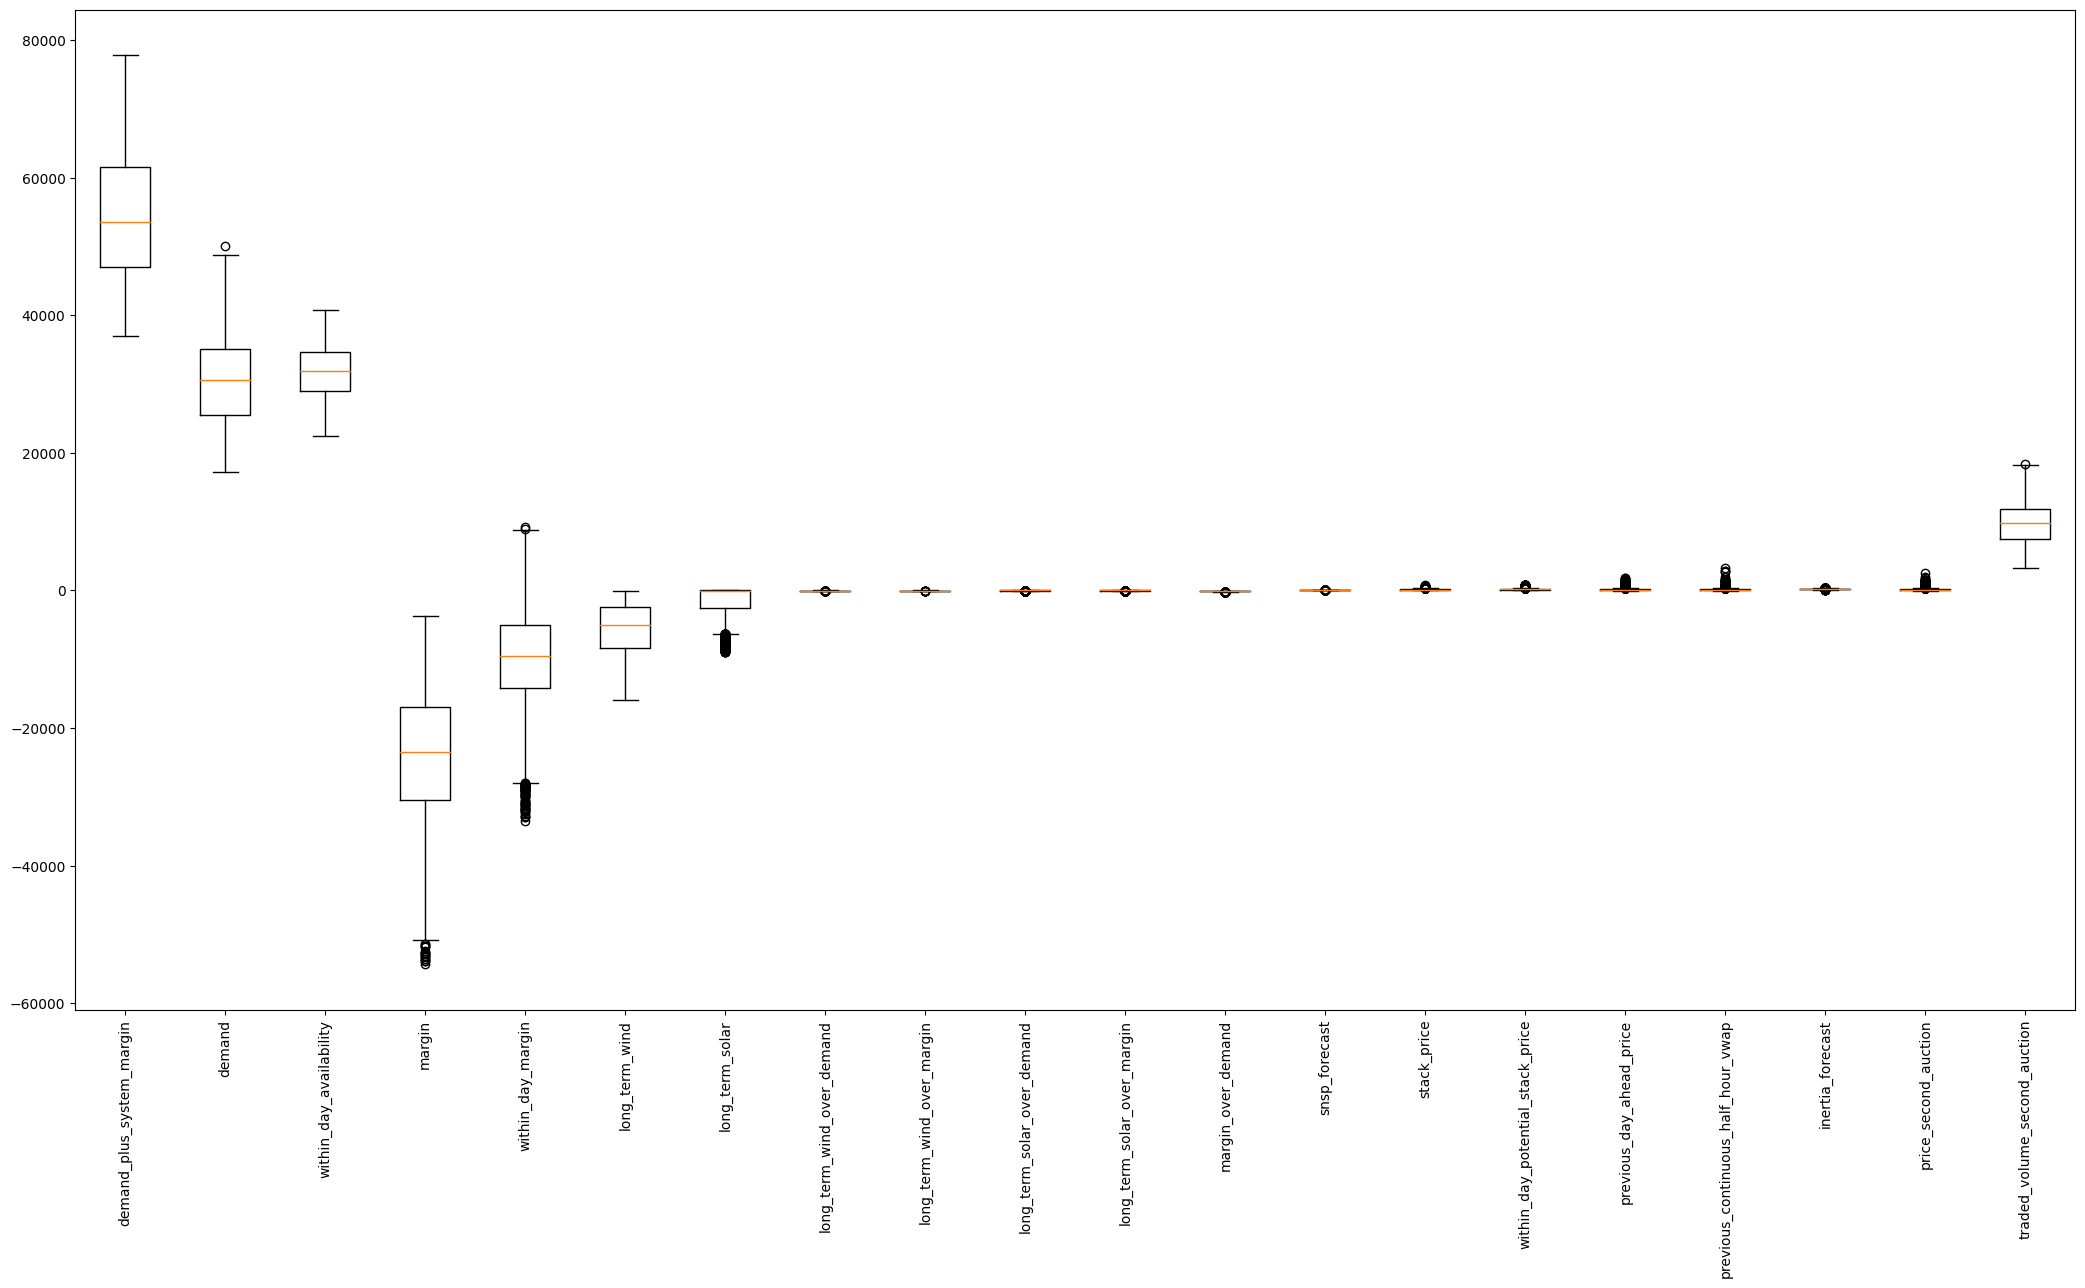

In [ ]:
def plot_boxplots(df, column):
    fig = plt.figure(figsize = (20, 10))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    # Creating plot
    box_plot = ax.boxplot(df[column]);
    # x-axis labels
    ax.set_xticklabels(column, rotation=90);

plot_boxplots(forecast_inputs_df, forecast_inputs_df.columns[1:])

Notice that there are certain columns, especially columns related to the price, contain outliers. However, we need to keep in mind that these are "recorded" price data and outlier/extreme values are not uncommon when it comes to eletricity prices for the day-ahead market.

For columns that are skewed toward the zero value, they can cause problems like over-fitting in the machine learning models. However, these values could stem from events such as the system being switched off. Therefore, we don't need any treatments to the outliers

# **2. Build forecasting model**

### **2.1 Exploratory data analysis (EDA)**

To begin with, notice that a few of the columns are derived from other columns: `demand_plus_system_margin`, `margin`, `within_day_margin`, `margin_over_demand`, `long_term_wind_over_demand`, `long_term_wind_over_margin`, `long_term_solar_over_demand`, `long_term_solar_over_margin`, `within_day_potential_stack_price`.

Furthermore, the `price_second_auction` will be used for testing, and `traded_volume_second_auction` is not  available at real-time when we forecast, so these two columns are not included in the features table.

By dropping the derived columns, we can reduce the sparsity of the dataset, and consequently, reduce overfitting.


In [ ]:
forecast_features_df = forecast_inputs_df.drop(columns = ["demand_plus_system_margin", "margin", "within_day_margin",
                                                          "margin_over_demand", "long_term_wind_over_demand",
                                                          "long_term_wind_over_margin", "long_term_solar_over_demand",
                                                          "long_term_solar_over_margin", "within_day_potential_stack_price",
                                                          "price_second_auction", "traded_volume_second_auction"])

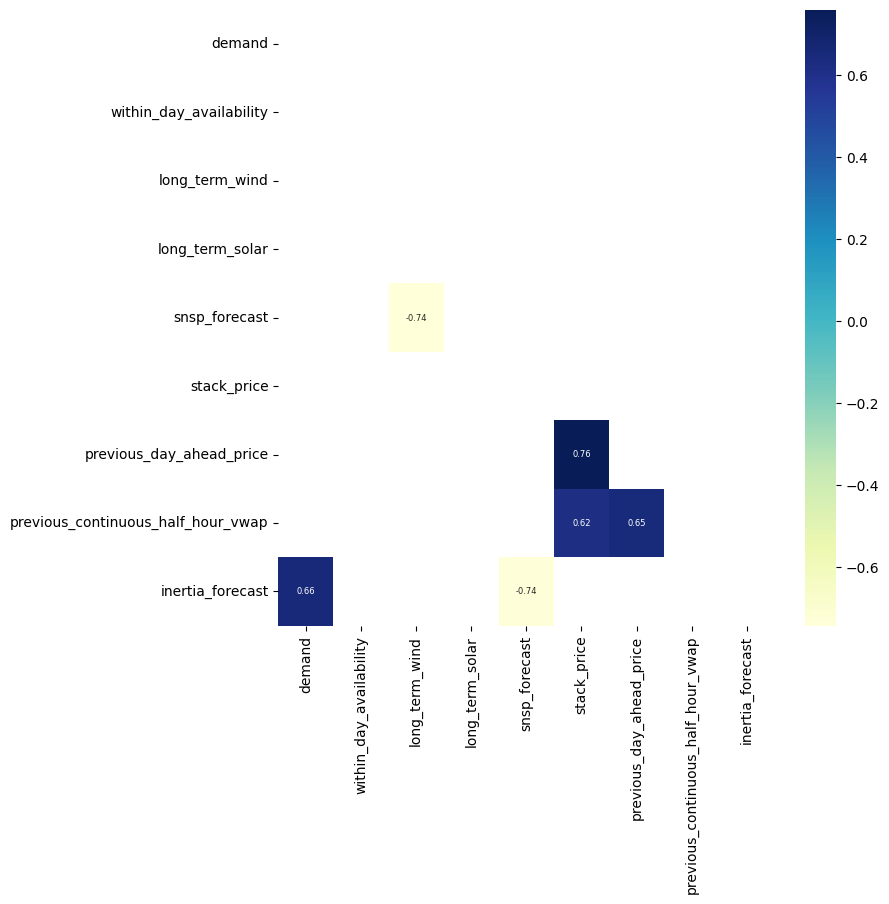

In [ ]:
import seaborn as sns

plt.figure(figsize = (8, 8))
correlation_df = forecast_features_df[forecast_features_df.columns[1:]].corr()
sns.heatmap(correlation_df[(correlation_df >= 0.5) | (correlation_df <= -0.5)],   # Only display correlation above 0.5
            annot=True, cmap ='YlGnBu',
            mask = np.triu(correlation_df),
            annot_kws={"fontsize":6});

 The above heatmap suggests that there is multicollinearity in our data. Looking at correlations only among pairs of predictors (i.e., bi-variate relationships) however, is limiting. It is possible that the pairwise correlations are small, and yet a linear dependence exists among three or even more variables (i.e., multivariate relationships)

 Therefore, we can use variance inflation factors (VIF) to help detect multicollinearity. VIF measure how much the variance is inflated because the standard errors — and hence the variances — of the estimated coefficients are inflated when multicollinearity exists.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = forecast_features_df.columns[1:]
vif["vif"] = [variance_inflation_factor(np.array(forecast_features_df[forecast_features_df.columns[1:]].values, dtype=float), i)
                     for i in range(forecast_features_df.shape[1]-1)]
vif.sort_values(by='vif', ascending=False)

,features,vif
8,inertia_forecast,119.317281
0,demand,104.973553
1,within_day_availability,99.777367
4,snsp_forecast,45.575665
5,stack_price,12.958736
2,long_term_wind,11.658929
6,previous_day_ahead_price,8.452468
7,previous_continuous_half_hour_vwap,5.192385
3,long_term_solar,3.070710


The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

From the heatmap and VIF, we can remove `inertia_forecast`. However, we cannot afford to get rid all of the features with VIFs above ten as that left us with only three predictors. Therefore, it might be the case that OLS is not the most suitable forecasting model.

In [ ]:
forecast_features_df = forecast_features_df.drop(columns = ["inertia_forecast"])

### **2.2 Train-test split**

As we are dealing with time-series, sequential data, we are splitting the dataset based on a date. For this, we would like a 70-30 split, where 70% of the dataset is used for training and 30% used for testing.



In [ ]:
# Obtain the date for the 60-40 train-test split
forecast_inputs_df['Date (WET)'][int(len(forecast_inputs_df) * 0.7)]

'2022-03-11 00:00:00'

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = [i for i in forecast_features_df.columns[1:]]


predict_col_name = ['price_second_auction']

forecast_inputs_df = forecast_inputs_df.set_index('Date (WET)')
train = forecast_inputs_df.loc[:'2022-03-11 00:00:00']
test = forecast_inputs_df.loc['2022-03-11 00:00:00':]

X_train = train[feature_col_names]
X_test = test[feature_col_names]
y_train = train[predict_col_name]
y_test = test[predict_col_name]

Create plotting function to visualize the predicted testing and training data

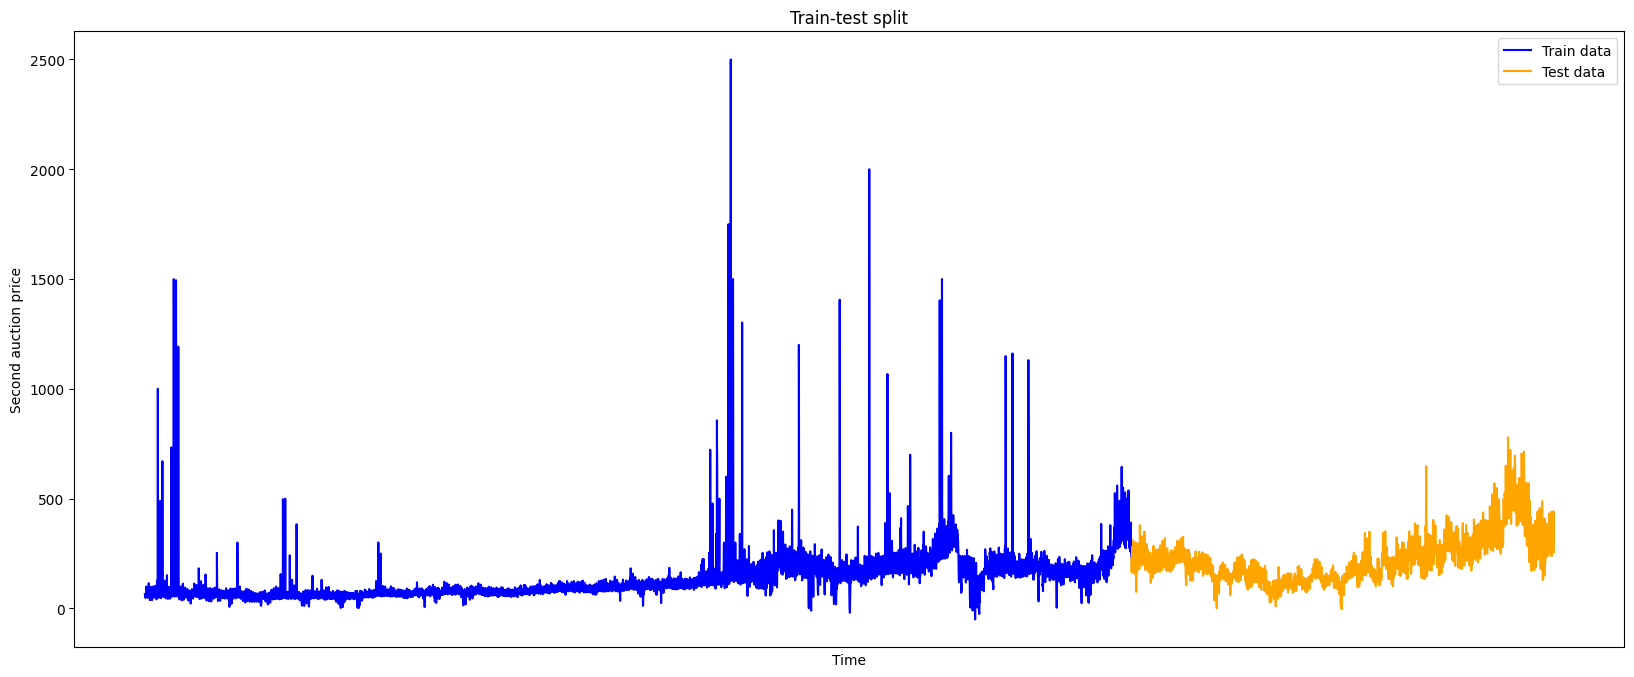

In [ ]:
plt.figure(figsize=(20,8))

x_train = forecast_inputs_df.loc[:'2022-03-11 00:00:00'].index.values
y_train = train['price_second_auction']
plt.plot(x_train, y_train, color = "blue", label = "Train data")
x_test = forecast_inputs_df.loc['2022-03-11 00:00:00':].index.values
y_test = test['price_second_auction']
plt.plot(x_test, y_test, color = "orange", label = "Test data")
plt.xlabel("Time")  # add X-axis label
plt.ylabel("Second auction price")  # add Y-axis label
plt.title("Train-test split")  # add title

# show a legend on the plot
plt.legend()
# disabling xticks by setting xticks to an empty list
plt.xticks([])
plt.show();

**Regresssion performance metrics**

To evaluate the regression model, we can use the following metrics

1.   **Root mean square error (RMSE)**: Measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).
2.   **R-Squared**: Determines the proportion (what %) of variance in the dependent variable (i.e., `second_auction_price`) that can be explained/is predictable by the independent variable
3.   **Adjusted R-Squared**: On adding new features to the model, the R-Squared value either increases or remains the same. R-Squared does not penalize for adding features that add no value to the model. To rectify this, R-Squared is adjusted with the number of independent variables. Adjusted R-Squared is always lower than R-Squared, as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.



In [ ]:
from sklearn import metrics

def regression_performance_metrics(model, X_train, y_train, X_test, y_test):
  Rsq_train = model.score(X_train, y_train)
  print("R square on training data: {}".format(round(Rsq_train, 4)))
  Rsq = model.score(X_test, y_test)
  print("R square on testing data: {}".format(round(Rsq, 4)))
  adj_r2 = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
  print("Adj. R square on training data: {} %".format(round(adj_r2*100,2)))
  adj_r2 = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
  print("Adj. R square on testing data: {} %".format(round(adj_r2*100,2)))
  y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("RMSE on train data: {}".format(round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),2)))
  print("RMSE on test data: {}".format(round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2)))

  print()
  x = y_test
  y = y_pred
  # Fit linear regression via least squares with numpy.polyfit
  # It returns an slope (b) and intercept (a)
  # deg = 1 means linear fit (i.e. polynomial of degree 1)
  a, b = np.polyfit(x, y, deg = 1)
  plt.scatter(x, y);
  # add line of best fit to plot
  plt.plot(x, a*x+b, color='red', linestyle='--', linewidth=2)
  plt.title('Actual vs Predicted scatter plot');
  plt.xlabel("Actual price")
  plt.ylabel("Predicted price");

### **2.3 Linear regression (OLS)**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

R square on training data: 0.6533
R square on testing data: 0.8335
Adj. R square on training data: 65.3 %
Adj. R square on testing data: 83.32 %
RMSE on train data: 62.52
RMSE on test data: 44.39



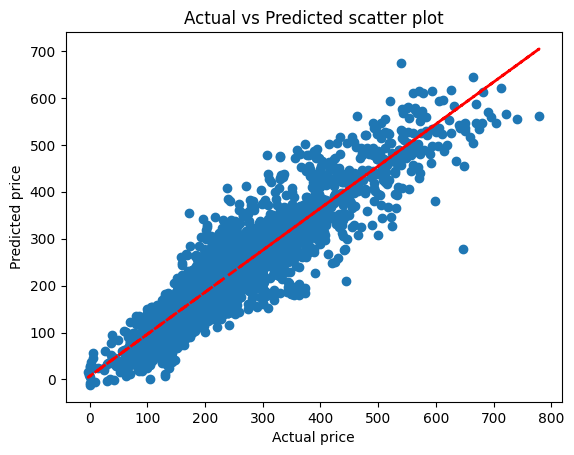

In [ ]:
regression_performance_metrics(lin_reg, X_train, y_train, X_test, y_test)

Notice that the model generalized on the dataset as the R-squared is 83.32% on test data while it's 65.3% on train data. In other words 83.32 % of the variations in the test data is explained by the predictors without overfitting on the train data.

### **2.4 Linear regression (PLS)**

To tackle multicollinearity, one solution is using Partial Least Squares regression (PLS) in place of Ordinary Least Square regression (OLS). PLS reduces the variables that are used to predict to a smaller set of predictors. These predictors are then used to perfom a regression.

PLS regression combines features from and generalizes principal component analysis (PCA) and multivariate linear regression.

1.   **PCA**: PLS regression searches for a set of components (called latent vectors) that performs a simultaneous decomposition of X and Y with the constraint that these components explain as much as
possible of the covariance between X and Y. This step generalizes PCA.
2.   **Regression**: It is followed by a regression step where the latent vectors obtained from X are used to predict Y

(*Note: PCA decomposes X in order to obtain components
which best explains X. By contrast, PLS regression
finds components from X that best predict Y*)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_train, y_train)

PLSRegression()

R square on training data: 0.6372
R square on testing data: 0.8553
Adj. R square on training data: 63.69 %
Adj. R square on testing data: 85.51 %
RMSE on train data: 63.96
RMSE on test data: 41.38



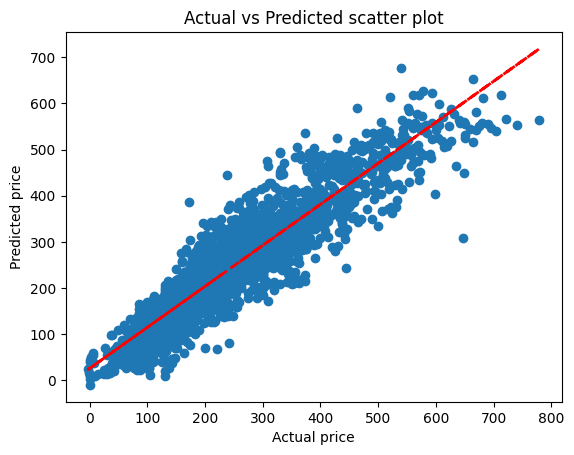

In [ ]:
regression_performance_metrics(pls2, X_train, y_train, X_test, y_test)

We can see the same pattern where the PLS regressor generalized on the dataset. Although the PLS perform slightly better than the OLS, the difference is insignificant.

### **2.5 Random forest**

Random forest is an estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=30, random_state=0)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, random_state=0)

R square on training data: 0.972
R square on testing data: 0.5966
Adj. R square on training data: 97.2 %
Adj. R square on testing data: 59.58 %
RMSE on train data: 17.76
RMSE on test data: 69.1



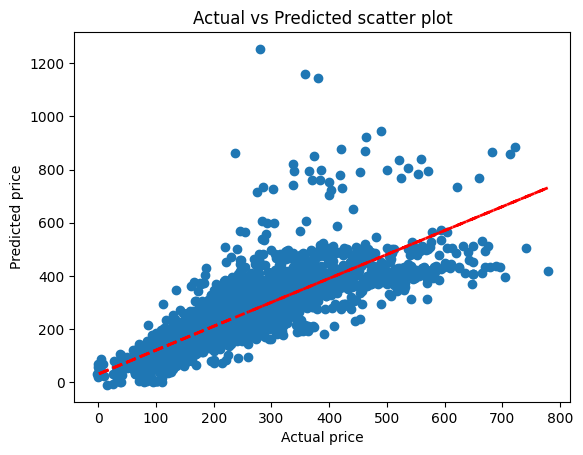

In [ ]:
regression_performance_metrics(rf_regr, X_train, y_train, X_test, y_test)

We can see the opposite trend from the linear models displayed here, where the R-squared is up to 97.2 % for the train data, but only 59.58 % for the test data. This signal over-fitting, as the model perform extremely well for the train data but not comparable for test data.

One potentiall explanation is that Random Forest treats each row independently, so it will ignore any kind of time series correlations (i.e., time series have an interdependence between observations, which the model will ignore). Therefore, when dealing with time series, the time-dependent structure is lost, assuming the observations are independent

### **2.6 XGBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

xgboost_regr = GradientBoostingRegressor(**params)
xgboost_regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          n_estimators=500)

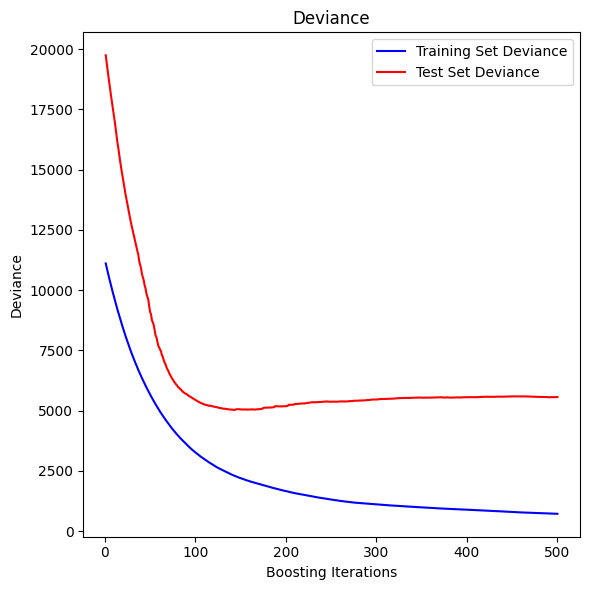

In [ ]:
from sklearn.metrics import mean_squared_error

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(xgboost_regr.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    xgboost_regr.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

R square on training data: 0.9359
R square on testing data: 0.5296
Adj. R square on training data: 93.59 %
Adj. R square on testing data: 52.88 %
RMSE on train data: 26.88
RMSE on test data: 74.62



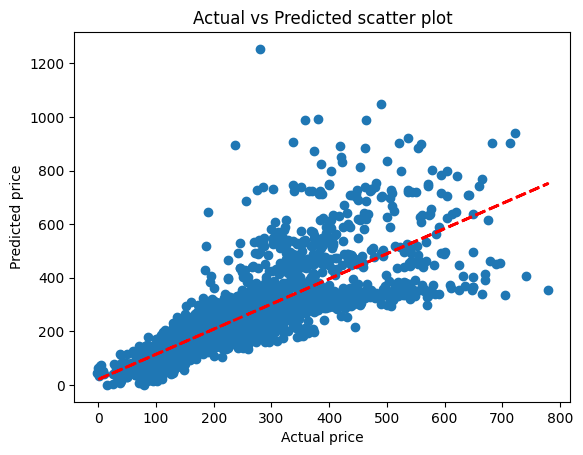

In [ ]:
regression_performance_metrics(xgboost_regr, X_train, y_train, X_test, y_test)

We can see the same overfitting pattern with the XGBoost regressor as well.

# **3. Forecasting the second auction price**

We can see that among the four models, PLS and OLS regression are our best model with equivalent performance and that they do not overfit (unlike the tree-based models).

We will use our PLS regression model to forecast the second auction price

In [ ]:
auction_data_df.set_index('Date (WET)', inplace = True)
forecast_inputs_df = forecast_inputs_df[forecast_inputs_df.index.isin(auction_data_df.index)]
auction_data_df = auction_data_df[~auction_data_df.index.duplicated()]
forecast_inputs_df = forecast_inputs_df[~forecast_inputs_df.index.duplicated()]
print(f"rows in forecasting data: {forecast_inputs_df.shape[0]}")
print(f"rows in auction data: {auction_data_df.shape[0]}")

rows in forecasting data: 14878
rows in auction data: 14878


In [ ]:
auction_data_df['price_forecast_second_auction'] = lin_reg.predict(forecast_inputs_df[feature_col_names])
auction_data_df = auction_data_df.reset_index()
auction_data_df.head()

<ipython-input-24-a7264270f968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auction_data_df['price_forecast_second_auction'] = lin_reg.predict(forecast_inputs_df[feature_col_names])


,Date (WET),price_first_auction,price_second_auction,traded_volume_first_auction,traded_volume_second_auction,price_forecast_first_auction,price_forecast_second_auction
0,2021-01-01 00:00:00,68.0,65.73,2923.7,5102.4,54.19,64.840077
1,2021-01-01 01:00:00,62.7,64.96,2825.0,4771.5,53.42,60.886404
2,2021-01-01 02:00:00,56.0,60.47,2611.4,4176.2,50.13,52.266738
3,2021-01-01 03:00:00,50.1,52.50,2669.3,3755.9,50.28,49.277567
4,2021-01-01 04:00:00,50.0,48.98,2741.4,4047.5,47.19,46.268518


In [ ]:
auction_data_df.to_csv("auction_data_df_(forecasted).csv", index=False, header=True)